In [14]:
import straxen
import cutax
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
import extraction
import alignment

import importlib
importlib.reload(alignment)

<module 'alignment' from '/home/yuanlq/xenon/compeaks/notebooks/../alignment.py'>

In [2]:
AR_AVAILABLE = np.array(['034160', '033781', '033492', '033492', '033582', '033823',
       '033841', '034145', '033555', '033573', '034211', '034076',
       '033995', '034163', '033540', '034157', '033802', '033781',
       '034301', '034013', '033959', '033995', '034235', '033790',
       '033488', '033564', '034274', '034142', '034280', '033475',
       '034250', '034214', '034262', '034148', '034301', '034121',
       '034292', '034097', '033519', '034028', '033841', '033501',
       '034070', '033591', '033745', '034250', '033579', '033796',
       '033826', '034016'])

KR_AVAILABLE = np.array(['018223', '018834', '030532', '030430', '030403', '023392',
       '030406', '018902', '018913', '025633', '033226', '023555',
       '018767', '029509', '018614', '031903', '018253', '018568',
       '028701', '027016', '018653', '018929', '028665', '018777',
       '025633', '021731', '018630', '030505', '019188', '018844',
       '018617', '018722', '018503', '018578', '019240', '021725',
       '030355', '028656', '018485', '023479', '018759', '033256',
       '030484', '024345', '021530', '023395', '030448', '027039',
       '026419', '018364'])

# Load true peaks

In [3]:
ars1_peak_extra = extraction.get_peak_extra(runs=AR_AVAILABLE, signal_type='ArS1')

Loading 50 runs:   0%|          | 0/50 [00:00<?, ?it/s]

In [4]:
krs1a_peak_extra = extraction.get_peak_extra(runs=KR_AVAILABLE, signal_type='KrS1A')

Loading 50 runs:   0%|          | 0/50 [00:00<?, ?it/s]

In [5]:
krs1b_peak_extra = extraction.get_peak_extra(runs=KR_AVAILABLE, signal_type='KrS1B')

Loading 50 runs:   0%|          | 0/50 [00:00<?, ?it/s]

# Average waveforms

290613it [00:04, 70221.90it/s]


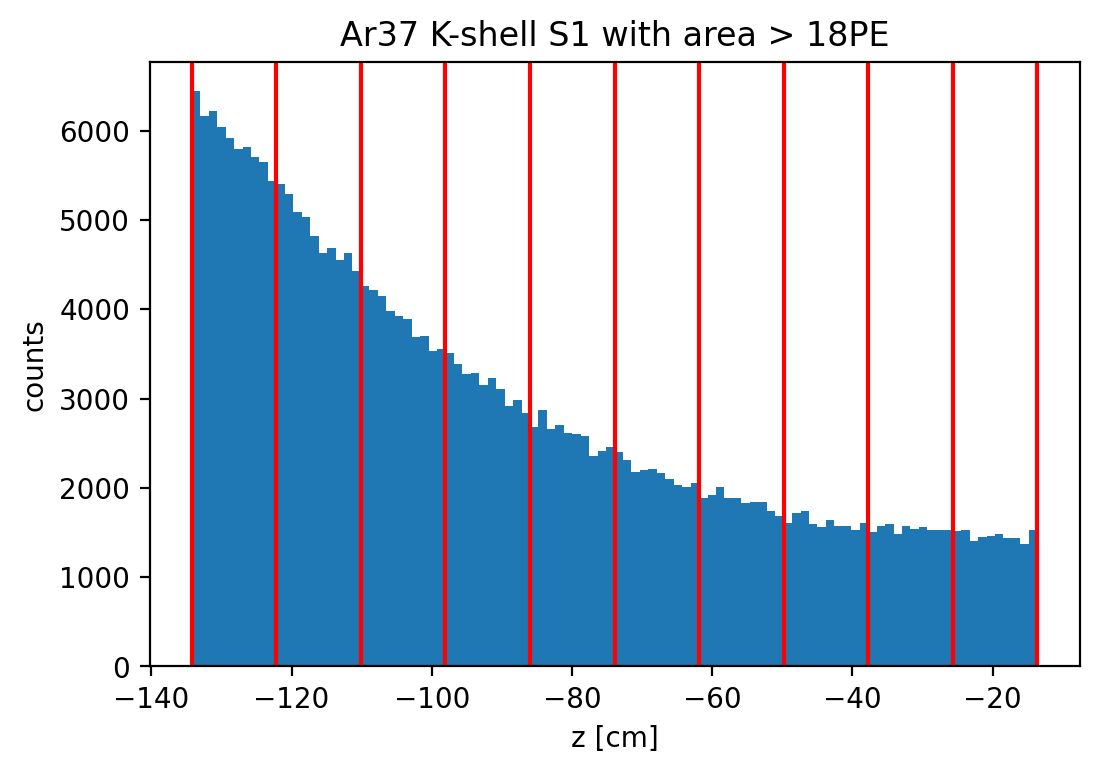

In [22]:
ars1_aligned_area20 = alignment.align_area_range(ars1_peak_extra)

peaks = ars1_peak_extra[(ars1_peak_extra['dt']==10)&(ars1_peak_extra['area']>18)]
z_slices = np.linspace(np.min(peaks['z']), np.max(peaks['z']), 11)

plt.figure(dpi=200)
plt.hist(peaks['z'], bins=100)
for z in z_slices:
    plt.axvline(z, color='r')
plt.xlabel('z [cm]')
plt.ylabel('counts')
plt.title('Ar37 K-shell S1 with area > 18PE')
plt.show()

# compute average waveform
ars1_avg_wf_mean = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
ars1_avg_wf_err = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
for i in range(len(z_slices)-1):
    peaks_z = peaks[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    ars1_avg_wf_mean[i] = np.mean(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    ars1_avg_wf_err[i] = np.std(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)

195968it [00:02, 65628.67it/s]


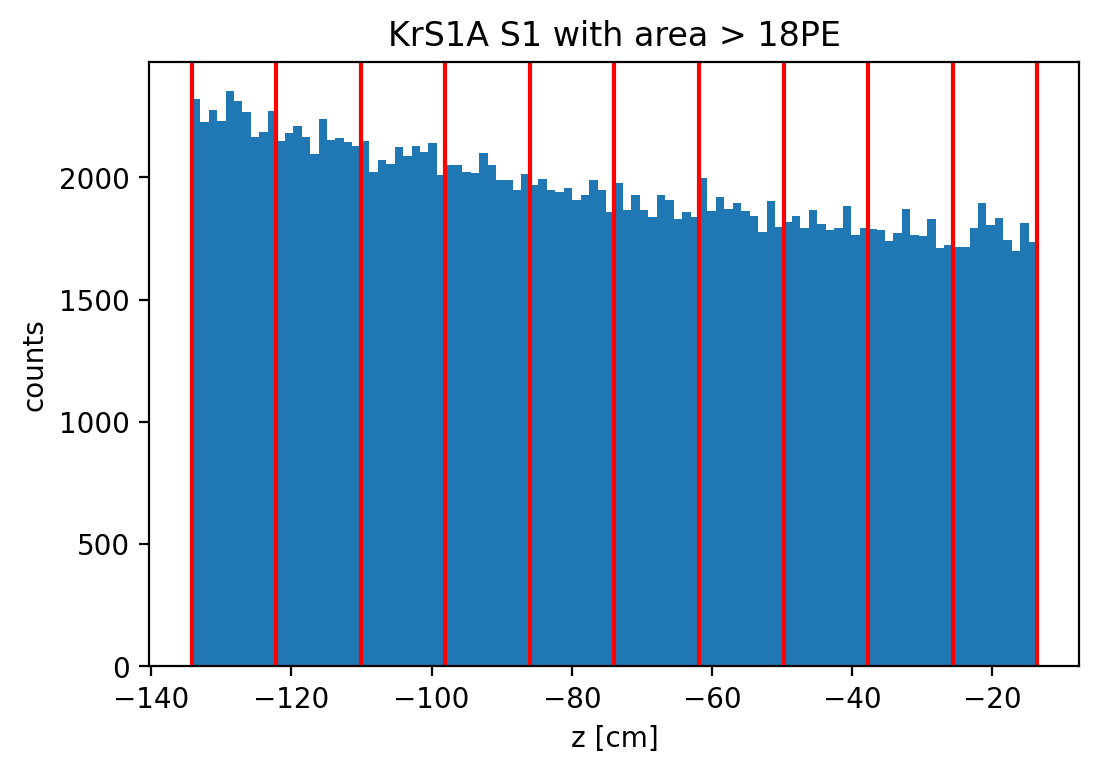

In [23]:
krs1a_aligned_area20 = alignment.align_area_range(krs1a_peak_extra)

peaks = krs1a_peak_extra[(krs1a_peak_extra['dt']==10)&(krs1a_peak_extra['area']>18)]
z_slices = np.linspace(np.min(peaks['z']), np.max(peaks['z']), 11)

plt.figure(dpi=200)
plt.hist(peaks['z'], bins=100)
for z in z_slices:
    plt.axvline(z, color='r')
plt.xlabel('z [cm]')
plt.ylabel('counts')
plt.title('KrS1A S1 with area > 18PE')
plt.show()

# compute average waveform
krs1a_avg_wf_mean = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
krs1a_avg_wf_err = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
for i in range(len(z_slices)-1):
    peaks_z = peaks[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    krs1a_avg_wf_mean[i] = np.mean(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    krs1a_avg_wf_err[i] = np.std(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)

195621it [00:02, 70192.59it/s]


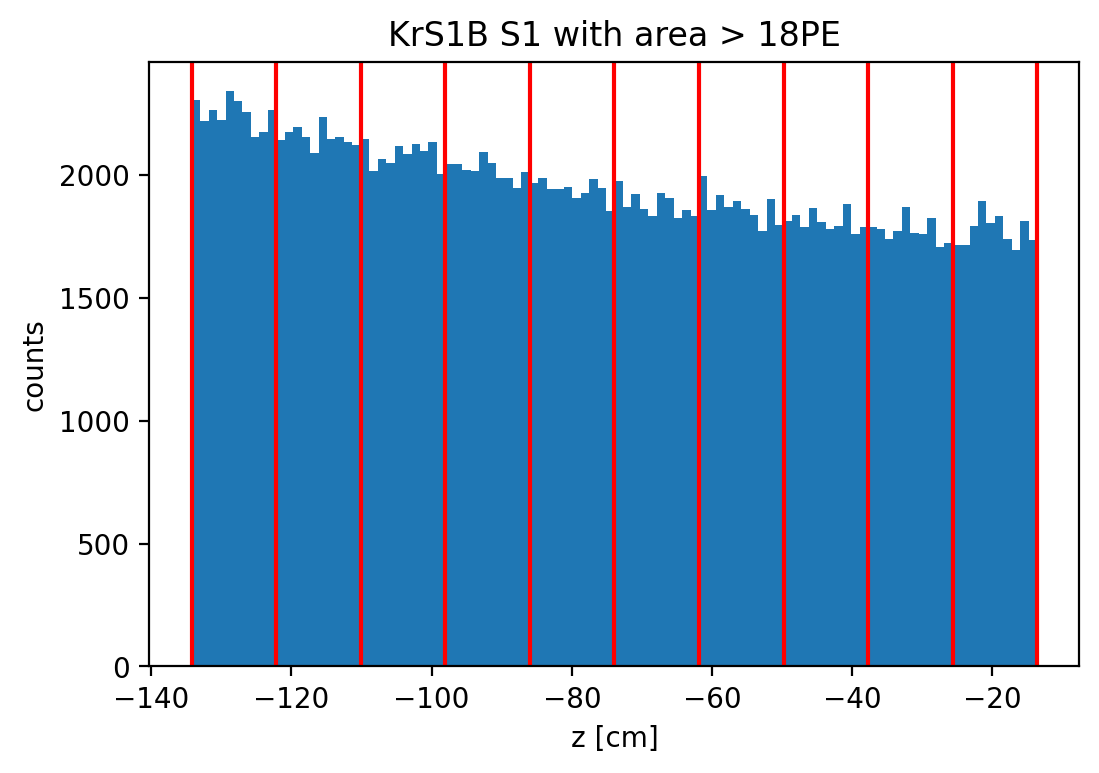

In [24]:
krs1b_aligned_area20 = alignment.align_area_range(krs1b_peak_extra)

peaks = krs1a_peak_extra[(krs1b_peak_extra['dt']==10)&(krs1b_peak_extra['area']>18)]
z_slices = np.linspace(np.min(peaks['z']), np.max(peaks['z']), 11)

plt.figure(dpi=200)
plt.hist(peaks['z'], bins=100)
for z in z_slices:
    plt.axvline(z, color='r')
plt.xlabel('z [cm]')
plt.ylabel('counts')
plt.title('KrS1B S1 with area > 18PE')
plt.show()

# compute average waveform
krs1b_avg_wf_mean = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
krs1b_avg_wf_err = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
for i in range(len(z_slices)-1):
    peaks_z = peaks[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    krs1b_avg_wf_mean[i] = np.mean(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    krs1b_avg_wf_err[i] = np.std(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)

(0.0, 35.0)

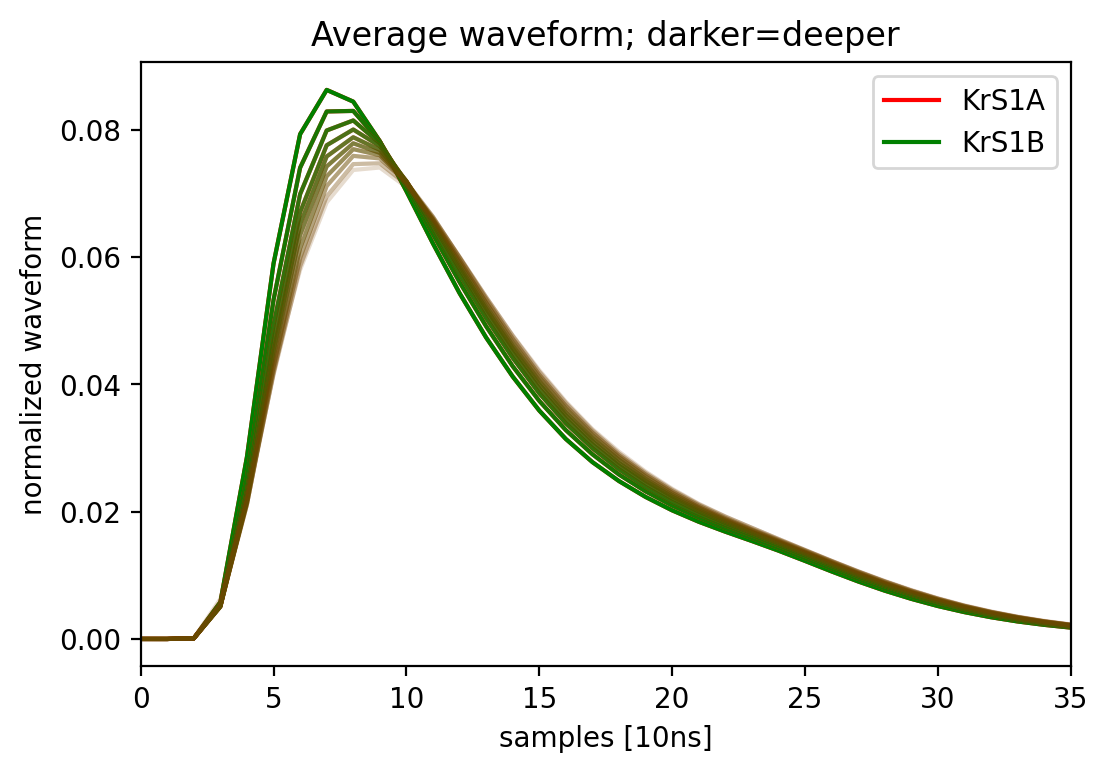

In [47]:
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        #plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i, label='ArS1')
        plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i, label='KrS1A')
        plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i, label='KrS1B')
    else:
        #plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i)
        plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i)
        plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(0,35)

(0.0, 35.0)

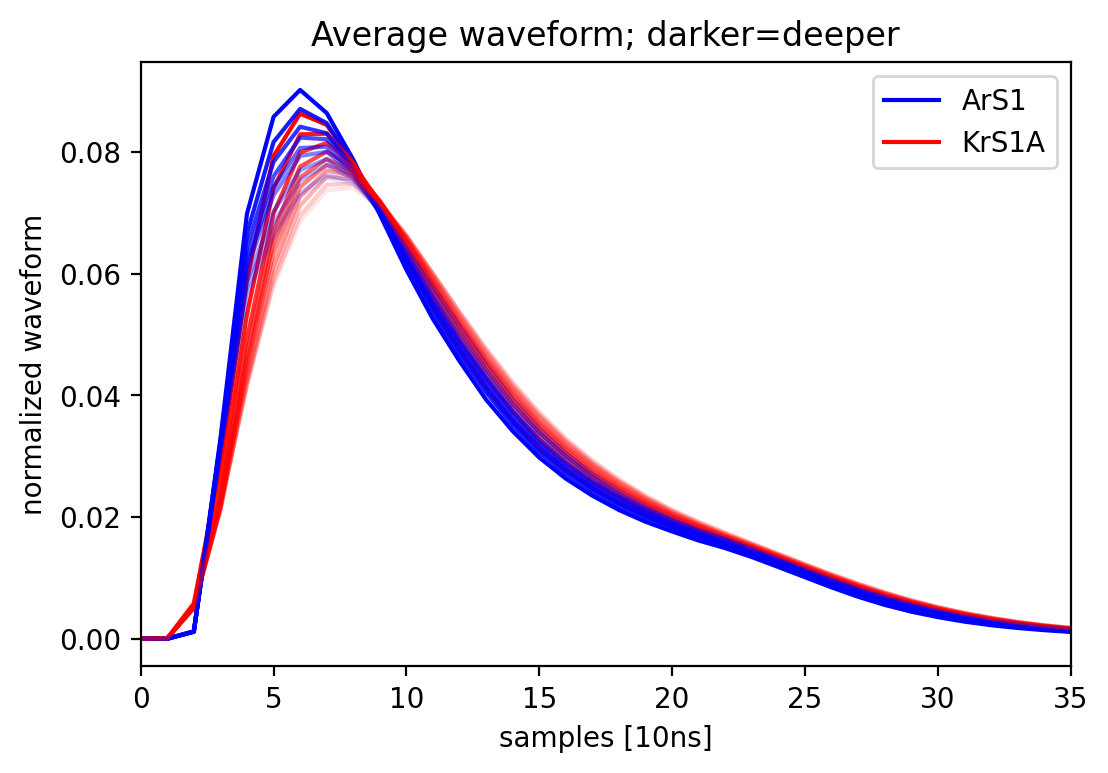

In [49]:
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i, label='ArS1')
        plt.plot(krs1a_avg_wf_mean[i,1:], color='r', alpha=1-0.1*i, label='KrS1A')
        #plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i, label='KrS1B')
    else:
        plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i)
        plt.plot(krs1a_avg_wf_mean[i,1:], color='r', alpha=1-0.1*i)
        #plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(0,35)